### 1. Data Preparation & Basic Visualisations 

#### Data cleaning and EDA



In [71]:
#Import Libraries

import pandas as pd
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



import warnings
warnings.filterwarnings("ignore")

In [72]:
#Import Dataset

df = pd.read_csv('dailbudget2023.csv')

In [73]:
# Explore data head

df.head()

,Post Title,Post Time,Comment,Comment Time,Comment Time (Formatted),Comment Score
0,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,Posting a bit early so people know where to go...,1.696933e+09,2023-10-10 11:14:12,1
1,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,20% fare reduction on public transport continu...,1.696943e+09,2023-10-10 13:55:05,39
2,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,This is good.,1.696944e+09,2023-10-10 14:16:50,3
3,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,"Aaaaaahhhhh, what have the Greens done for us!",1.696953e+09,2023-10-10 16:56:05,2
4,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,"€67 million to provide 16,000 craft apprentice...",1.696944e+09,2023-10-10 14:18:04,25


In [74]:
# Explore data shape

df.shape

(479, 6)

In [75]:
# Describe data

df.describe()

,Comment Time,Comment Score
count,4.790000e+02,479.000000
mean,1.696949e+09,5.538622
std,1.333263e+04,8.244567
min,1.696933e+09,-25.000000
25%,1.696943e+09,2.000000
50%,1.696946e+09,3.000000
75%,1.696952e+09,7.500000
max,1.697121e+09,76.000000


In [76]:
# Look at data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Post Title                479 non-null    object 
 1   Post Time                 479 non-null    object 
 2   Comment                   479 non-null    object 
 3   Comment Time              479 non-null    float64
 4   Comment Time (Formatted)  479 non-null    object 
 5   Comment Score             479 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 22.6+ KB


In [77]:
# Explore unique values

df.nunique()

Post Title                    1
Post Time                     1
Comment                     467
Comment Time                473
Comment Time (Formatted)    473
Comment Score                44
dtype: int64

In [78]:
df.isna().sum()

Post Title                  0
Post Time                   0
Comment                     0
Comment Time                0
Comment Time (Formatted)    0
Comment Score               0
dtype: int64

In [79]:
# Print shape of columns

num_attr = df.shape[1]
print("Number of Attributes:", num_attr)

Number of Attributes: 6


In [80]:
# Print shape of entries

num_obv = df.shape[0]
print("Number of Observations:", num_obv)

Number of Observations: 479


In [81]:
#Check which features contain categorical data


# Identify columns with categorical values
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print(categorical_columns)

['Post Title', 'Post Time', 'Comment', 'Comment Time (Formatted)']


In [82]:
#Convert formatted comment time objects to a recoginised date time column

df['Comment Time (Formatted)'] = pd.to_datetime(df['Comment Time (Formatted)'], format='%Y-%m-%d %H:%M:%S')

print(df)

                                          Post Title            Post Time  \
0    Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
1    Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
2    Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
3    Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
4    Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
..                                               ...                  ...   
474  Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
475  Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
476  Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
477  Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   
478  Dail budget 2023 announcement 1pm (live stream)  2023-10-10 11:12:27   

                                               Comment  Comment Time  \
0  

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Post Title                479 non-null    object        
 1   Post Time                 479 non-null    object        
 2   Comment                   479 non-null    object        
 3   Comment Time              479 non-null    float64       
 4   Comment Time (Formatted)  479 non-null    datetime64[ns]
 5   Comment Score             479 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 22.6+ KB


In [84]:
df.sample(5)

,Post Title,Post Time,Comment,Comment Time,Comment Time (Formatted),Comment Score
467,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,>USCs 4.5% is being reduced to 4%.\n\nDid I he...,1.696946e+09,2023-10-10 14:45:55,1
0,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,Posting a bit early so people know where to go...,1.696933e+09,2023-10-10 11:14:12,1
367,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,> Did I read that right in that landlords are ...,1.696944e+09,2023-10-10 14:16:01,11
132,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,Kicked the vape tax down the road for another ...,1.696951e+09,2023-10-10 16:22:36,22
62,Dail budget 2023 announcement 1pm (live stream),2023-10-10 11:12:27,"It is, but in the context of the current cost ...",1.696945e+09,2023-10-10 14:40:54,7


#### As we can see from the above, the 'Post Title','Post Time' and 'Comment Time' columnes are all either repeats of 
#### the same information or in a format that is of no use to us - we can drop these

In [85]:
# Drop un-needed columns 

df = df.drop(['Post Title', 'Post Time', 'Comment Time'], axis=1)

In [86]:
df.head()

,Comment,Comment Time (Formatted),Comment Score
0,Posting a bit early so people know where to go...,2023-10-10 11:14:12,1
1,20% fare reduction on public transport continu...,2023-10-10 13:55:05,39
2,This is good.,2023-10-10 14:16:50,3
3,"Aaaaaahhhhh, what have the Greens done for us!",2023-10-10 16:56:05,2
4,"€67 million to provide 16,000 craft apprentice...",2023-10-10 14:18:04,25


In [ ]:
# Now we can rename our columns to make our coding easier/more streamlined 

In [87]:
df.rename(columns={'Comment Time (Formatted)': 'Time', 'Comment Score': 'Score'}, inplace=True)

In [88]:
df.head()

,Comment,Time,Score
0,Posting a bit early so people know where to go...,2023-10-10 11:14:12,1
1,20% fare reduction on public transport continu...,2023-10-10 13:55:05,39
2,This is good.,2023-10-10 14:16:50,3
3,"Aaaaaahhhhh, what have the Greens done for us!",2023-10-10 16:56:05,2
4,"€67 million to provide 16,000 craft apprentice...",2023-10-10 14:18:04,25


In [89]:
# Check for missing values
missing_values = df.isnull()

# Count the number of missing values in each column
missing_values_count = missing_values.sum()

# Display the count of missing values
print("\nNumber of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
Comment    0
Time       0
Score      0
dtype: int64


### Score Basic Visualisations 

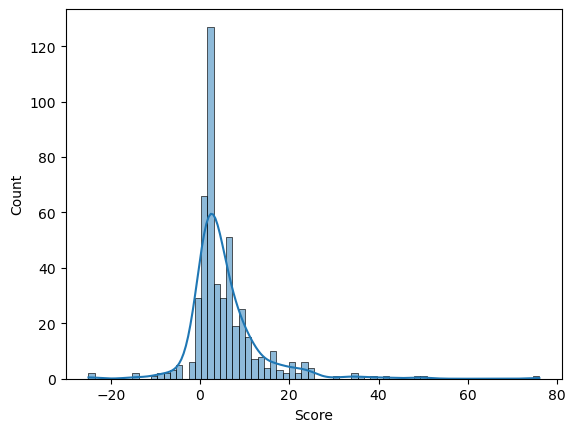

In [90]:
# Check distribution of 'Scores' for comments using histogram plot

sns.histplot(df['Score'], kde=True)
plt.show()

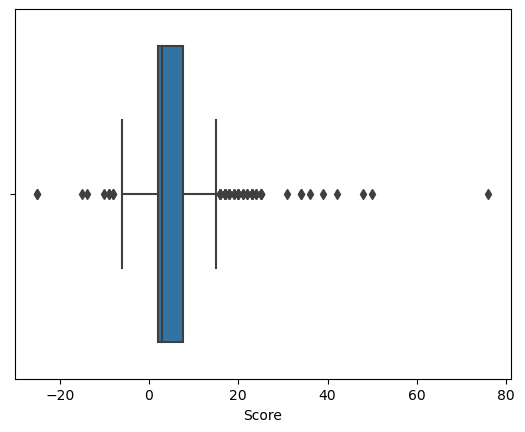

In [91]:
# Check distribution of 'Scores' for comments using box plot

sns.boxplot(x=df['Score'])
plt.show()

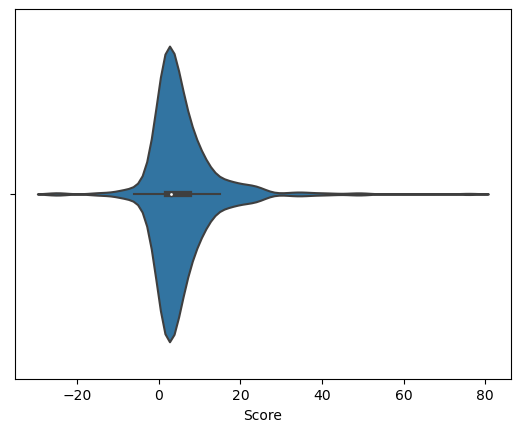

In [92]:
# Check distribution of 'Scores' for comments using violin plot

sns.violinplot(x=df['Score'])
plt.show()

### Date Time Basic Visualisations 

In [93]:
df.head()

,Comment,Time,Score
0,Posting a bit early so people know where to go...,2023-10-10 11:14:12,1
1,20% fare reduction on public transport continu...,2023-10-10 13:55:05,39
2,This is good.,2023-10-10 14:16:50,3
3,"Aaaaaahhhhh, what have the Greens done for us!",2023-10-10 16:56:05,2
4,"€67 million to provide 16,000 craft apprentice...",2023-10-10 14:18:04,25


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Comment  479 non-null    object        
 1   Time     479 non-null    datetime64[ns]
 2   Score    479 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.4+ KB


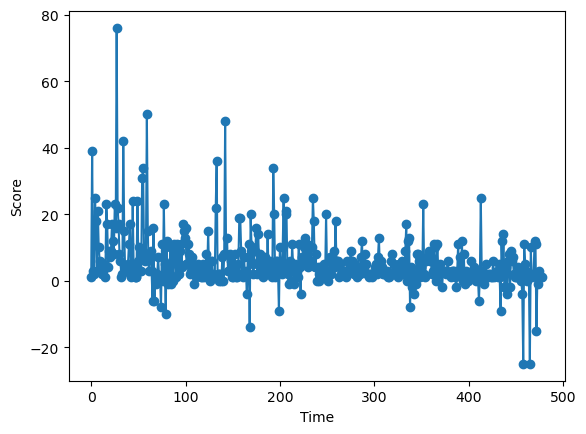

In [95]:
# Plot scores against time on X axis

df['Time'] = pd.to_datetime(df['Time'])
df['Score'].plot(x='Time', style='-', marker='o')
plt.xlabel('Time')
plt.ylabel('Score')
plt.show()

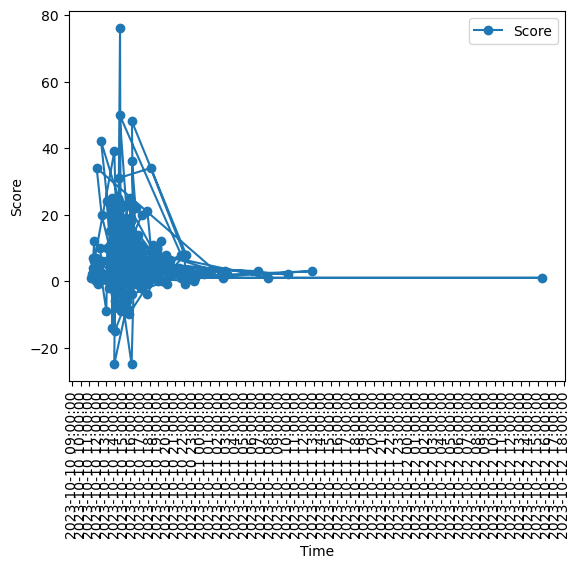

In [102]:
# Plot time series using scores as Y axis


df['Time'] = pd.to_datetime(df['Time'])

# Plotting
plt.plot(df['Time'], df['Score'], marker='o', linestyle='-', label='Score')
plt.xlabel('Time')
plt.ylabel('Score')

# Formatting the time axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Adjust the interval as needed

# Rotating x-axis labels for better visibility
plt.xticks(rotation=90)  # Set the rotation angle here

# Display legend 
plt.legend()

plt.show()

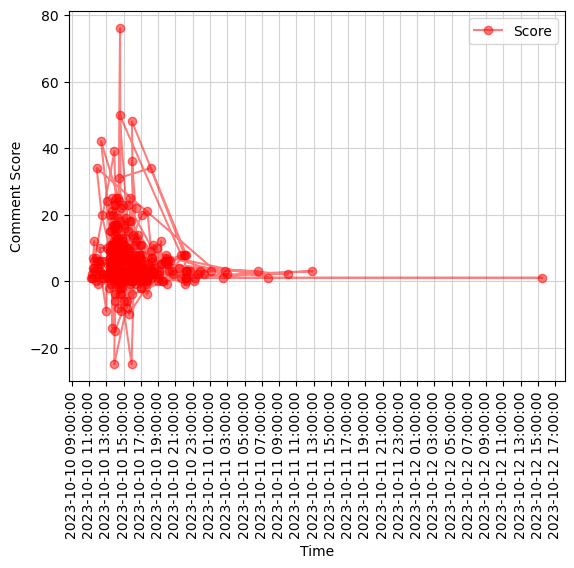

In [115]:
# Improve on above chart

df['Time'] = pd.to_datetime(df['Time'])

# Plot the time chart
plt.plot(df['Time'], df['Score'], marker='o', linestyle='-', label='Score', color='Red', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Comment Score')

# Format time axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  

# Rotate x-axis labels 
plt.xticks(rotation=90)  

# Display legend 
plt.legend()

# Add grid
plt.grid(True, color='lightgray') 

plt.show()

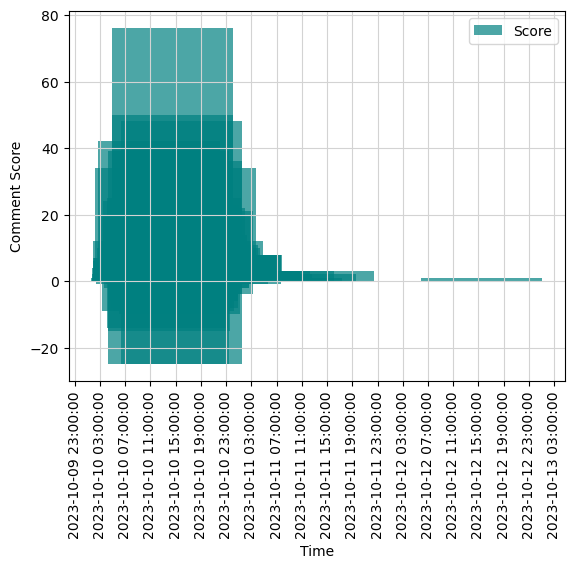

In [114]:
# Plot bar chart for the 'Score' column

plt.bar(df['Time'], df['Score'], color='teal', alpha=0.7, label='Score')

# Add labels 
plt.xlabel('Time')
plt.ylabel('Comment Score')

# Format the time axis with a specific date and time format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))  # Set the interval to 4 hours

# Rotate x-axis labels 
plt.xticks(rotation=90)

# Display the legend
plt.legend()

# Add a grid with light gray color
plt.grid(True, color='lightgray')

# Display the plot
plt.show()


In [116]:
# Export dataframe to new .csv file


df.to_csv('db2023_cleandf.csv', index=False)